## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap SVC discovery scan (normal)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/user/notebooks/pcaps/nmap_svc_discovery_normal'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [4]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.058556
Name: time, dtype: float64

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times
#duration_list

0    0.058556
1    0.054549
2    0.065666
3    0.061987
4    0.057291
5    0.059019
6    0.054778
7    0.078603
8    0.081603
9    0.054753
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [8]:
temp.mean()

0    0.06268
dtype: float64

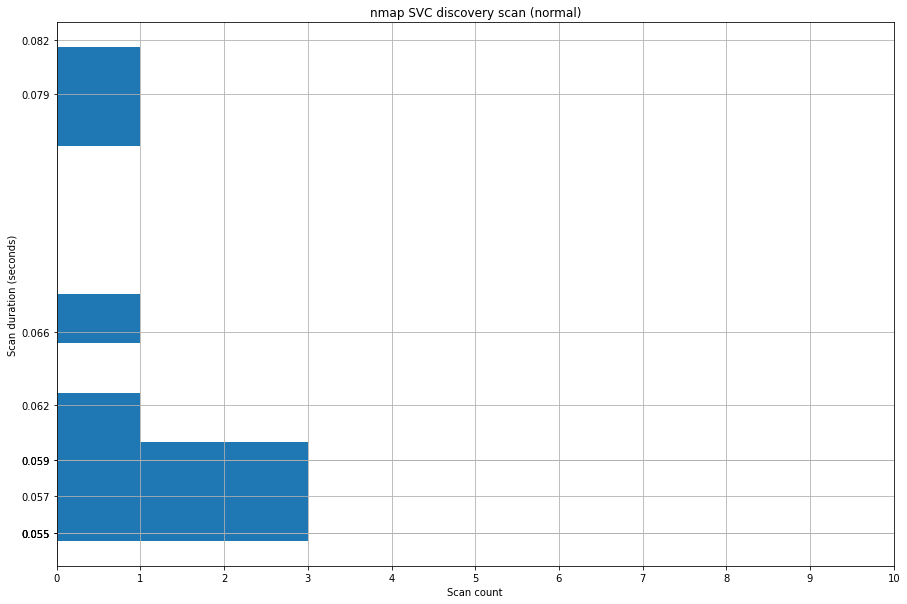

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.062680
std,0.009842
min,0.054549
25%,0.055406
50%,0.058787
75%,0.064746
max,0.081603


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1253.6091804504395



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 41597 995
2 41597 113
3 41597 256
4 41597 111
5 41597 554
6 41597 445
7 41597 3306
8 41597 22
9 41597 23
10 41597 25
11 41597 443
12 41597 8080
13 41597 21
14 41597 587
15 41597 143
16 41597 139
17 41597 1723
18 41597 80
19 41597 8888
20 41597 199
21 41597 993
22 41597 1720
23 41597 53
24 41597 110
25 41597 3389
26 41597 1025
27 41597 135
28 41597 5900
29 41597 82
30 41597 15660
31 41597 4899
32 41597 1093
33 41597 3006
34 41597 7999
35 41597 1666
36 41597 2323
37 41597 2048
38 41597 4002
39 41597 1717
40 41597 3168
41 41597 1721
42 41597 9101
43 41597 7070
44 41597 7625
45 41597 8290
46 41597 1185
47 41597 1658
48 41597 1039
49 41597 1067
50 41597 5633
51 41597 5405
52 41597 6389
53 41597 1126
54 41597 1065
55 41597 2920
56 41597 5961
57 41597 9618
58 41597 9002
59 41597 4006
60 41597 1052
61 41597 2492
62 41597 27355
63 41597 4444
64 41597 5440
65 41597 32769
66 41597 7100
67 41597 2710
68 41597 4224
69 41597 2030
70 41597 6025
71 41597 5907
72 41597 8192
73 41597 1033
74 41597 515

955 41597 10001
956 41597 8031
957 41597 9071
958 41597 726
959 41597 901
960 41597 4848
961 41597 7000
962 41597 32775
963 41597 9593
964 41597 6005
965 41597 1244
966 41597 49400
967 41597 34571
968 41597 3324
969 41597 1175
970 41597 2008
971 41597 1812
972 41597 1117
973 41597 64680
974 41597 1106
975 41597 9220
976 41597 1248
977 41597 30718
978 41597 10024
979 41597 12265
980 41597 749
981 41597 2038
982 41597 18101
983 41597 981
984 41597 49176
985 41597 8800
986 41597 5802
987 41597 6112
988 41597 55056
989 41597 1141
990 41597 3052
991 41597 4045
992 41597 648
993 41597 2811
994 41597 1151
995 41597 44442
996 41597 2967
997 41597 8045
998 41597 179
999 41597 17
1000 41597 5950
1 33933 445
2 33933 53
3 33933 1025
4 33933 5900
5 33933 135
6 33933 1723
7 33933 8888
8 33933 23
9 33933 110
10 33933 22
11 33933 21
12 33933 111
13 33933 1720
14 33933 3389
15 33933 8080
16 33933 995
17 33933 256
18 33933 587
19 33933 139
20 33933 993
21 33933 80
22 33933 25
23 33933 143
24 33933 554
2

38 63738 2144
39 63738 616
40 63738 3001
41 63738 4343
42 63738 3690
43 63738 52869
44 63738 2126
45 63738 1524
46 63738 1700
47 63738 50500
48 63738 1000
49 63738 543
50 63738 17988
51 63738 8089
52 63738 32778
53 63738 11110
54 63738 6779
55 63738 26214
56 63738 34573
57 63738 1107
58 63738 3551
59 63738 52822
60 63738 30951
61 63738 41511
62 63738 17877
63 63738 9200
64 63738 6510
65 63738 7200
66 63738 62078
67 63738 1074
68 63738 6346
69 63738 4449
70 63738 5087
71 63738 481
72 63738 4848
73 63738 32774
74 63738 38292
75 63738 70
76 63738 9001
77 63738 1443
78 63738 9595
79 63738 5000
80 63738 4005
81 63738 406
82 63738 22939
83 63738 1185
84 63738 9040
85 63738 23502
86 63738 49158
87 63738 7496
88 63738 2605
89 63738 32780
90 63738 4000
91 63738 5960
92 63738 10629
93 63738 306
94 63738 161
95 63738 1023
96 63738 6106
97 63738 9009
98 63738 5050
99 63738 366
100 63738 1583
101 63738 15002
102 63738 1022
103 63738 55056
104 63738 9418
105 63738 5560
106 63738 1533
107 63738 2222


121 33784 5810
122 33784 1455
123 33784 1272
124 33784 10000
125 33784 55600
126 33784 4343
127 33784 55055
128 33784 3323
129 33784 7625
130 33784 4445
131 33784 30718
132 33784 8099
133 33784 85
134 33784 161
135 33784 11967
136 33784 6101
137 33784 5961
138 33784 524
139 33784 8083
140 33784 8180
141 33784 30000
142 33784 35500
143 33784 6667
144 33784 8291
145 33784 1149
146 33784 2725
147 33784 49
148 33784 1049
149 33784 545
150 33784 12265
151 33784 5678
152 33784 27715
153 33784 99
154 33784 1033
155 33784 3404
156 33784 52848
157 33784 1077
158 33784 7000
159 33784 2557
160 33784 6646
161 33784 6123
162 33784 2013
163 33784 340
164 33784 1914
165 33784 1024
166 33784 481
167 33784 5801
168 33784 32771
169 33784 1040
170 33784 1310
171 33784 6692
172 33784 4125
173 33784 24800
174 33784 1174
175 33784 1001
176 33784 30951
177 33784 9200
178 33784 10626
179 33784 3517
180 33784 5003
181 33784 3
182 33784 9010
183 33784 32770
184 33784 27352
185 33784 32785
186 33784 2875
187 337

261 41955 5910
262 41955 5963
263 41955 3301
264 41955 700
265 41955 1533
266 41955 9535
267 41955 9876
268 41955 27355
269 41955 9011
270 41955 8085
271 41955 2100
272 41955 8652
273 41955 3998
274 41955 2105
275 41955 1035
276 41955 1175
277 41955 1183
278 41955 32778
279 41955 55555
280 41955 1169
281 41955 6
282 41955 5100
283 41955 32779
284 41955 9898
285 41955 749
286 41955 8002
287 41955 82
288 41955 10001
289 41955 4126
290 41955 2967
291 41955 6566
292 41955 1042
293 41955 2522
294 41955 4444
295 41955 4998
296 41955 15004
297 41955 9081
298 41955 6025
299 41955 1521
300 41955 1066
301 41955 3814
302 41955 2043
303 41955 1032
304 41955 2126
305 41955 5500
306 41955 3800
307 41955 465
308 41955 8000
309 41955 1075
310 41955 6123
311 41955 5989
312 41955 10009
313 41955 5357
314 41955 2042
315 41955 687
316 41955 5902
317 41955 10002
318 41955 1494
319 41955 1721
320 41955 2005
321 41955 8300
322 41955 2107
323 41955 3011
324 41955 84
325 41955 1108
326 41955 1277
327 41955 204

454 54299 32778
455 54299 2007
456 54299 6000
457 54299 8383
458 54299 4443
459 54299 1277
460 54299 7627
461 54299 2383
462 54299 9929
463 54299 1081
464 54299 3030
465 54299 33899
466 54299 2099
467 54299 7676
468 54299 64680
469 54299 667
470 54299 1132
471 54299 2288
472 54299 1217
473 54299 992
474 54299 9618
475 54299 8100
476 54299 6389
477 54299 2003
478 54299 1096
479 54299 1038
480 54299 10628
481 54299 8084
482 54299 44501
483 54299 5030
484 54299 13722
485 54299 16113
486 54299 19842
487 54299 2103
488 54299 5902
489 54299 1218
490 54299 3880
491 54299 1187
492 54299 6003
493 54299 1641
494 54299 6881
495 54299 8083
496 54299 544
497 54299 1840
498 54299 16012
499 54299 2718
500 54299 44443
501 54299 9943
502 54299 1021
503 54299 4444
504 54299 1090
505 54299 14441
506 54299 726
507 54299 8085
508 54299 6007
509 54299 5822
510 54299 5000
511 54299 15002
512 54299 4567
513 54299 1169
514 54299 648
515 54299 16080
516 54299 9081
517 54299 1009
518 54299 17877
519 54299 9071
5

620 51661 5730
621 51661 4900
622 51661 23502
623 51661 4848
624 51661 8090
625 51661 16018
626 51661 5718
627 51661 7
628 51661 1022
629 51661 6646
630 51661 7676
631 51661 1301
632 51661 3784
633 51661 1174
634 51661 4004
635 51661 8001
636 51661 24800
637 51661 1145
638 51661 1054
639 51661 84
640 51661 2875
641 51661 3737
642 51661 5051
643 51661 2366
644 51661 4
645 51661 1984
646 51661 32780
647 51661 3007
648 51661 8002
649 51661 9415
650 51661 1216
651 51661 10616
652 51661 6
653 51661 34573
654 51661 1309
655 51661 3211
656 51661 1801
657 51661 9594
658 51661 417
659 51661 20031
660 51661 1038
661 51661 49160
662 51661 254
663 51661 19842
664 51661 7004
665 51661 1761
666 51661 9502
667 51661 5959
668 51661 1300
669 51661 32774
670 51661 1947
671 51661 90
672 51661 49154
673 51661 4003
674 51661 1072
675 51661 990
676 51661 481
677 51661 3370
678 51661 444
679 51661 6788
680 51661 5298
681 51661 800
682 51661 7002
683 51661 1074
684 51661 5678
685 51661 24
686 51661 88
687 516

272 53415 9998
273 53415 5815
274 53415 2557
275 53415 714
276 53415 15000
277 53415 3128
278 53415 389
279 53415 7001
280 53415 3871
281 53415 6689
282 53415 1334
283 53415 1002
284 53415 8002
285 53415 6699
286 53415 30000
287 53415 2968
288 53415 3001
289 53415 1192
290 53415 625
291 53415 3986
292 53415 1152
293 53415 18040
294 53415 2135
295 53415 2909
296 53415 425
297 53415 3
298 53415 8007
299 53415 1062
300 53415 1035
301 53415 8649
302 53415 12265
303 53415 1455
304 53415 55055
305 53415 1053
306 53415 1034
307 53415 13
308 53415 1126
309 53415 26
310 53415 8086
311 53415 49176
312 53415 1049
313 53415 1073
314 53415 10024
315 53415 32778
316 53415 1310
317 53415 340
318 53415 1218
319 53415 500
320 53415 7921
321 53415 8008
322 53415 27352
323 53415 9207
324 53415 7778
325 53415 2522
326 53415 5989
327 53415 6007
328 53415 3826
329 53415 1092
330 53415 1009
331 53415 3920
332 53415 6788
333 53415 9111
334 53415 3268
335 53415 990
336 53415 9009
337 53415 163
338 53415 1011
3

453 57775 7999
454 57775 30718
455 57775 32784
456 57775 1098
457 57775 8994
458 57775 6100
459 57775 1036
460 57775 9010
461 57775 6789
462 57775 705
463 57775 4000
464 57775 783
465 57775 2702
466 57775 9594
467 57775 5988
468 57775 3323
469 57775 6389
470 57775 8099
471 57775 5800
472 57775 427
473 57775 9220
474 57775 497
475 57775 50300
476 57775 3128
477 57775 90
478 57775 8090
479 57775 3005
480 57775 1112
481 57775 32783
482 57775 60020
483 57775 1132
484 57775 19801
485 57775 31038
486 57775 5414
487 57775 50389
488 57775 1998
489 57775 8193
490 57775 8500
491 57775 3301
492 57775 7921
493 57775 52848
494 57775 27355
495 57775 4004
496 57775 7070
497 57775 1040
498 57775 9943
499 57775 340
500 57775 9878
501 57775 1984
502 57775 16080
503 57775 1149
504 57775 2382
505 57775 1248
506 57775 5950
507 57775 6005
508 57775 3006
509 57775 2003
510 57775 1236
511 57775 4848
512 57775 5000
513 57775 24444
514 57775 5087
515 57775 912
516 57775 8045
517 57775 10010
518 57775 6059
519 5

619 53889 48080
620 53889 1151
621 53889 5431
622 53889 5822
623 53889 1154
624 53889 20
625 53889 6789
626 53889 5633
627 53889 2800
628 53889 5800
629 53889 125
630 53889 4003
631 53889 52673
632 53889 27355
633 53889 2100
634 53889 5051
635 53889 20828
636 53889 13456
637 53889 3000
638 53889 27352
639 53889 5190
640 53889 3493
641 53889 5280
642 53889 7800
643 53889 50000
644 53889 19842
645 53889 264
646 53889 4279
647 53889 3517
648 53889 32777
649 53889 8099
650 53889 1041
651 53889 13782
652 53889 3889
653 53889 44443
654 53889 1183
655 53889 19350
656 53889 1047
657 53889 4224
658 53889 6567
659 53889 16992
660 53889 2718
661 53889 563
662 53889 2301
663 53889 1040
664 53889 406
665 53889 7103
666 53889 1007
667 53889 1049
668 53889 1009
669 53889 8081
670 53889 212
671 53889 49999
672 53889 9500
673 53889 1063
674 53889 808
675 53889 49160
676 53889 1071
677 53889 8651
678 53889 6547
679 53889 1085
680 53889 880
681 53889 1186
682 53889 1062
683 53889 4004
684 53889 25735
685

In [15]:
orders_port

,scannr,sport,dport
0,1,41597,995
1,2,41597,113
2,3,41597,256
3,4,41597,111
4,5,41597,554
...,...,...,...
9995,996,53889,1175
9996,997,53889,9666
9997,998,53889,1083
9998,999,53889,8600


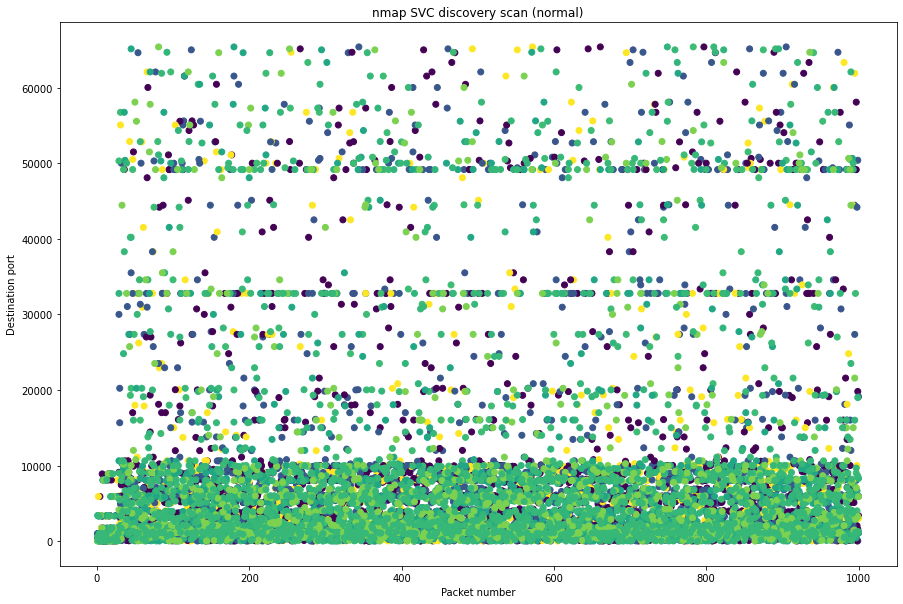

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

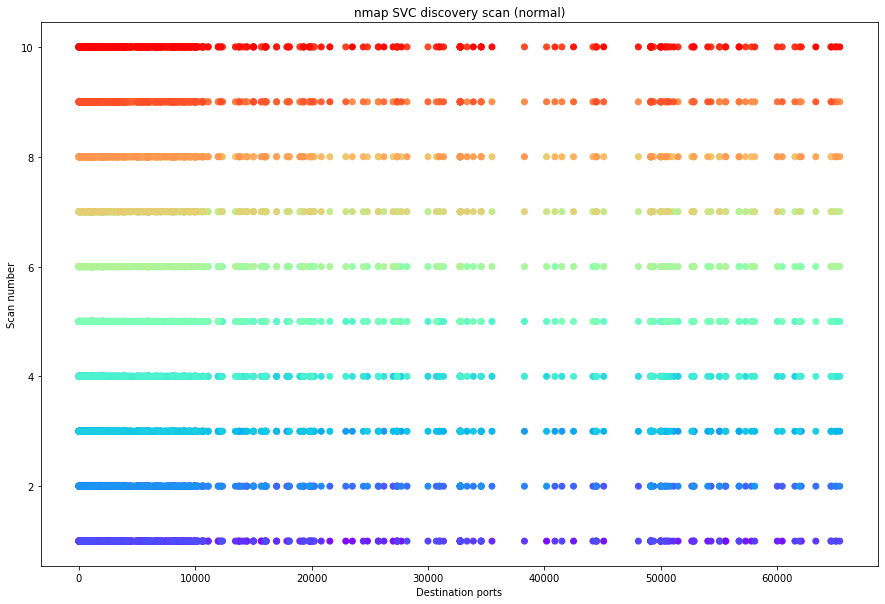

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

In [41]:
unused_ports = []
used_ports = []
for x in range(1, 65536):
    if x not in tcp_dports:
        unused_ports.append(x)
    elif x in tcp_dports:
        used_ports.append(x)

In [42]:
print(len(unused_ports))

64535


In [43]:
print(len(used_ports))

1000


## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

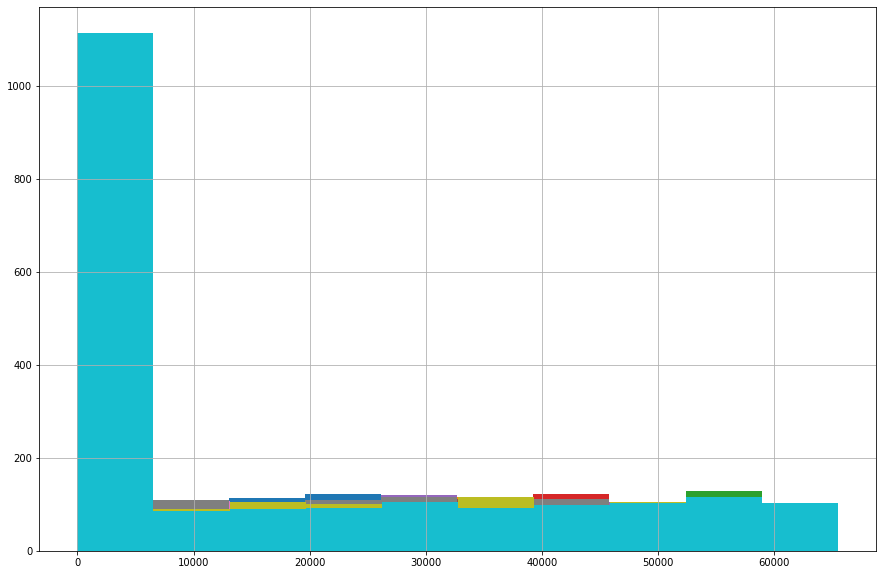

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

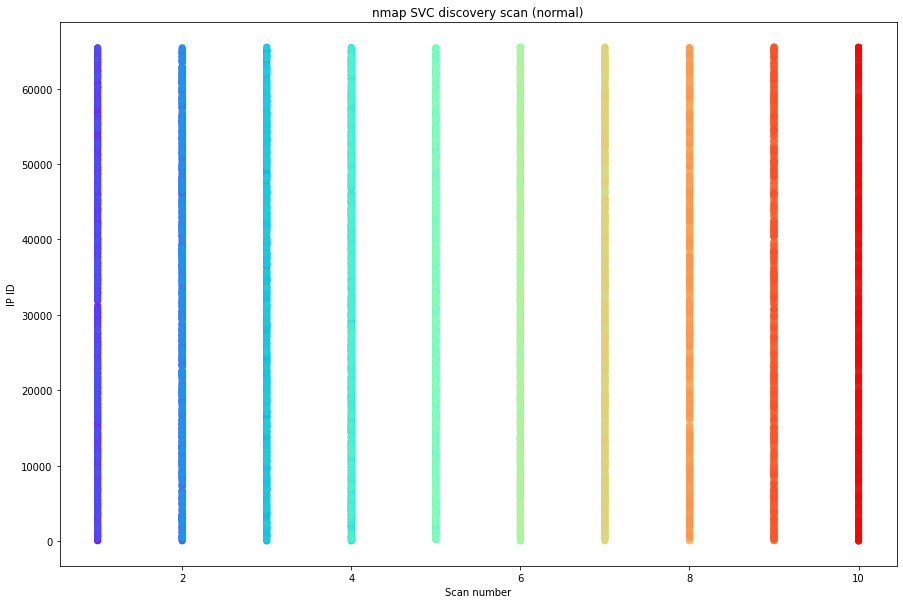

In [25]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


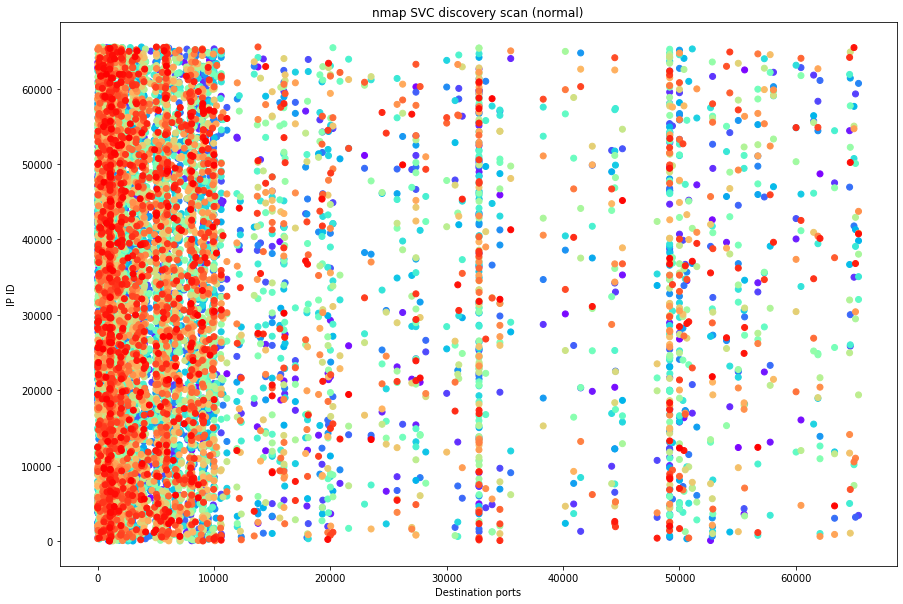

In [26]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

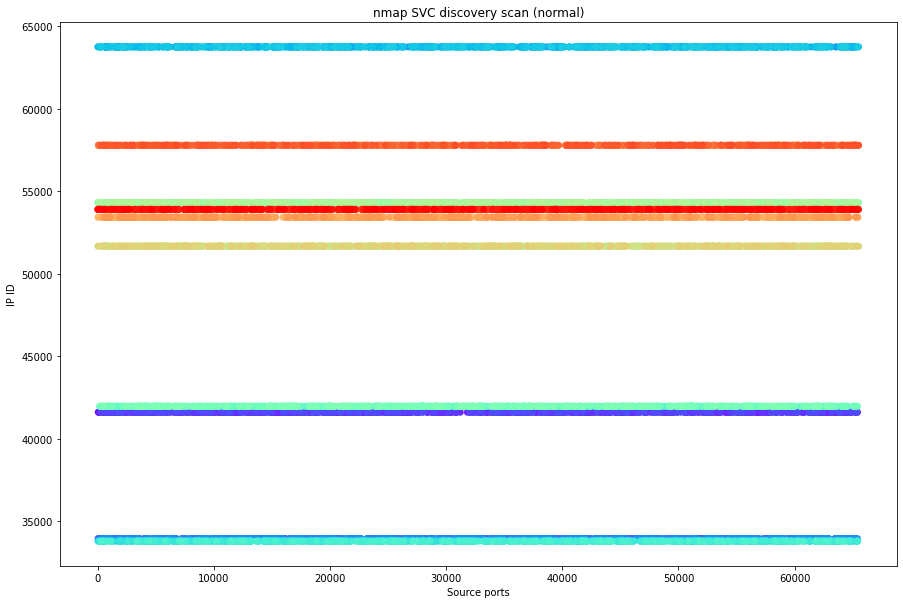

In [36]:
ip_ids = []
scan_number = []
#scan_nr = 0
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 2905651559
Sequence number: 290

Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 422

Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 4229054426
Sequence number: 422

Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
Sequence number: 930225808
S

Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 2756466834
Sequence number: 275

Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
S

Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
Sequence number: 475664843
S

Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 1363571742
Sequence number: 136

Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 1059775354
Sequence number: 105

Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 218

Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 2189182096
Sequence number: 218

Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 1921371248
Sequence number: 192

Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
Sequence number: 489365292
S

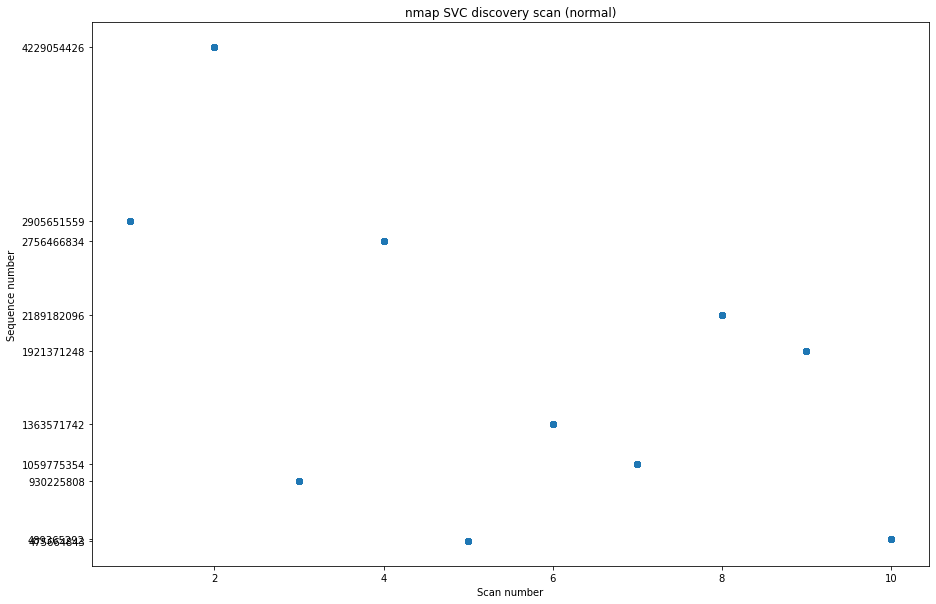

In [31]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


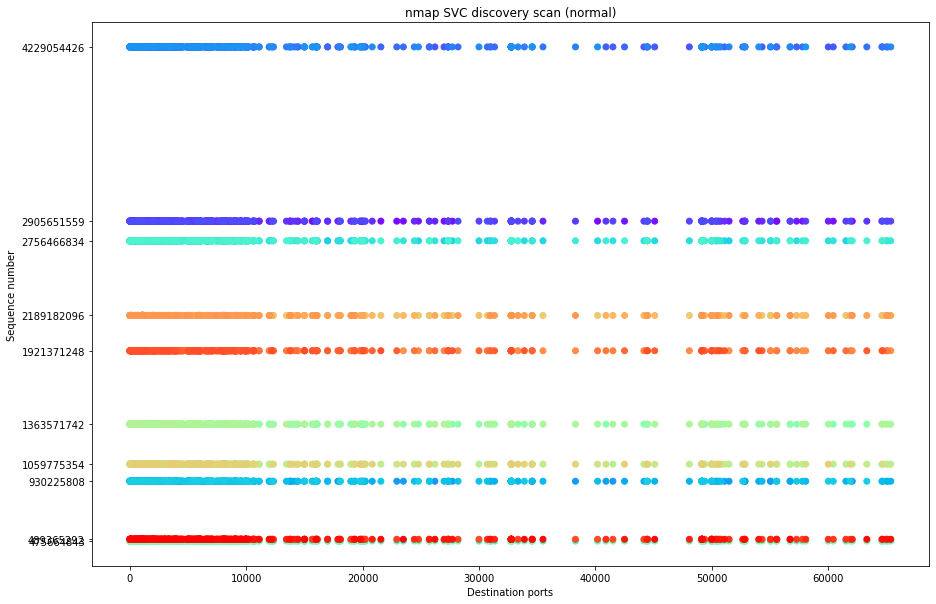

In [32]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

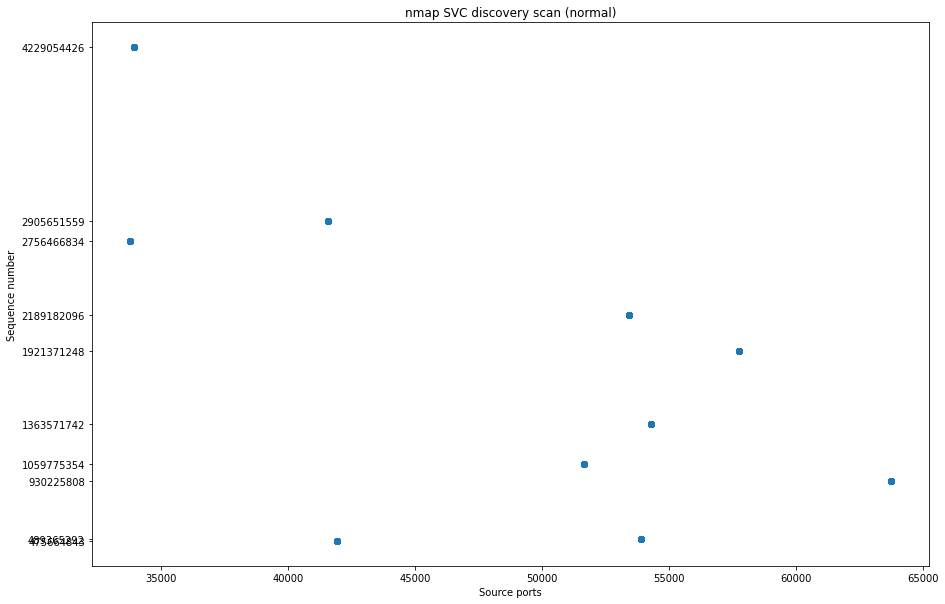

In [33]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [35]:
len(set(orders_port['sport']))

10

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F